In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.read_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,The Spider and the Fly,1949
3,Country,2000
4,The Golden Note,2017


In [5]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [7]:
all_movies_names = titles['title']
counting_all_movies_names = {}

for movie in all_movies_names:
    if movie in counting_all_movies_names.keys():
        counting_all_movies_names[movie] += 1
    else:
        counting_all_movies_names[movie] = 1
        
df = pd.DataFrame(list(counting_all_movies_names.items()), columns=['movie name', 'occurrence']).sort_values(by=['occurrence'])
top_ten = df.tail(10)[::-1]
top_ten

,movie name,occurrence
6293,Hamlet,20
1818,Carmen,17
4391,Macbeth,16
20541,Maya,12
57163,Temptation,12
18088,The Outsider,12
7831,Freedom,11
19688,The Three Musketeers,11
10860,Othello,11
46320,Honeymoon,11


### Which three years of the 1930s saw the most films released?

In [8]:
all_movies_1930s = titles[(titles['year'] >= 1930) & (titles['year'] <= 1939)]['year']

counting_years = {}

for year in all_movies_1930s:
    if year in counting_years.keys():
        counting_years[year] += 1
    else:
        counting_years[year] = 1
        
df = pd.DataFrame(list(counting_years.items()), columns=['Year', 'occurrence']).sort_values(by=['occurrence'])
top_three = df.tail(3)[::-1]
top_three

,Year,occurrence
6,1937,1224
5,1936,1169
3,1938,1163


### Plot the number of films that have been released each decade over the history of cinema.

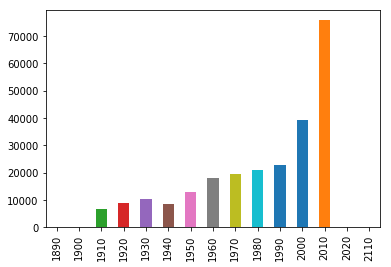

In [35]:
all_movies = (titles['year'] // 10 * 10).value_counts().sort_index().plot(kind='bar')
all_movies

### Plot the number of "Hamlet" films made each decade.

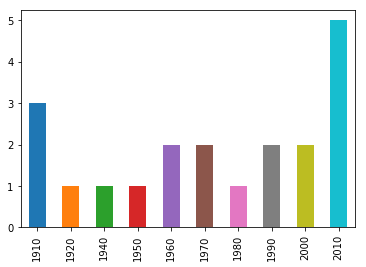

In [33]:
hamlet_movies = (titles[titles['title'] == 'Hamlet']['year'] // 10 * 10).value_counts().sort_index().plot(kind='bar')
hamlet_movies

### Plot the number of "Rustler" characters in each decade of the history of film.

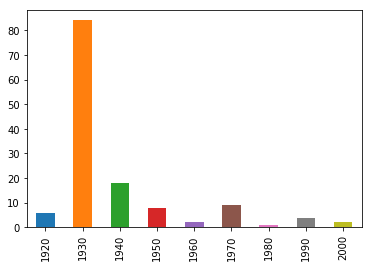

In [43]:
rustler_character = (cast[cast['character'] == 'Rustler']['year'] // 10 * 10).value_counts().sort_index().plot(kind='bar')
rustler_character

### Plot the number of "Hamlet" characters each decade.

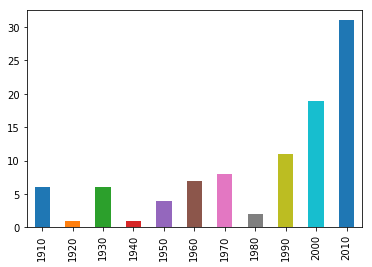

In [44]:
hamlet_character = (cast[cast['character'] == 'Hamlet']['year'] // 10 * 10).value_counts().sort_index().plot(kind='bar')
hamlet_character

### What are the 11 most common character names in movie history?

In [48]:
common_characters = cast['character'].value_counts().head(11)
common_characters

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Herself         6705
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [62]:
most_credited_herself = cast[(cast['character'] == 'Herself') & (cast['n'] == 1)]['name'].value_counts().head(10)
most_credited_herself

Bunny Yeager        2
Marlene Mc'Cohen    2
Maria Stinger       1
Brigitte Nielsen    1
Margaret Cho        1
Sheila E.           1
Lana Bettencourt    1
Deanna Hanger       1
Madge Evans         1
Rosita Pinedo       1
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [63]:
most_credited_himself = cast[(cast['character'] == 'Himself') & (cast['n'] == 1)]['name'].value_counts().head(10)
most_credited_himself

Manuel Valent?n-Fdez.    8
Michael J. Nelson        3
Perry Como               3
Adriano Celentano        2
Spalding Gray            2
Goh Nakamura             2
Omer Pasha               2
Marty Robbins            2
Dave Rickards            2
Chris Rex                2
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [67]:
most_apprearance_1945 = cast[cast['year'] == 1945]['name'].value_counts().head(10)
most_apprearance_1945

Emmett Vogan       39
Sam (II) Harris    33
Bess Flowers       29
Harold Miller      29
Franklyn Farnum    27
Frank O'Connor     27
Nolan Leary        27
Herman Hack        25
Larry Steers       25
Kenner G. Kemp     24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [68]:
most_apprearance_1985 = cast[cast['year'] == 1985]['name'].value_counts().head(10)
most_apprearance_1985

Mammootty        22
Shakti Kapoor    21
Sukumari         20
Aruna Irani      15
Raj Babbar       15
Lou Scheimer     15
Mohanlal         15
Deven Verma      13
Asrani           13
Om Shivpuri      13
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

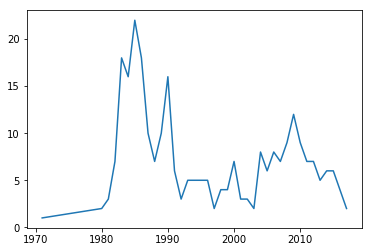

In [21]:
mammootty_career = cast[cast['name'] == 'Mammootty']['year'].value_counts().sort_index().plot()
mammootty_career

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [28]:
startswith_patronin = cast[cast['character'].str.startswith('Patron in')]['character'].value_counts().head(10)
startswith_patronin

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Audience               2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [29]:
startswith_science = cast[cast['character'].str.startswith('Science')]['character'].value_counts().head(10)
startswith_science

Science Teacher         60
Science Student          9
Science Fair Student     9
Science Fair Judge       6
Science Reporter         5
Science Fair Kid         5
Science Kid              5
Science Club Member      5
Science Promo Cadet      5
Science                  4
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

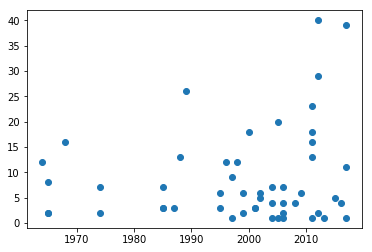

In [40]:
nvalues_jDench = cast[cast['name'] == 'Judi Dench']
x = nvalues_jDench['year']
y = nvalues_jDench['n']
plt.scatter(x, y)

### Plot the n-values of Cary Grant's roles through his career.

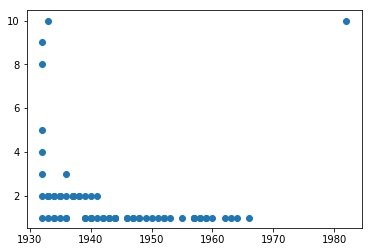

In [41]:
nvalues_cGrant = cast[cast['name'] == 'Cary Grant']
x = nvalues_cGrant['year']
y = nvalues_cGrant['n']
plt.scatter(x, y)

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

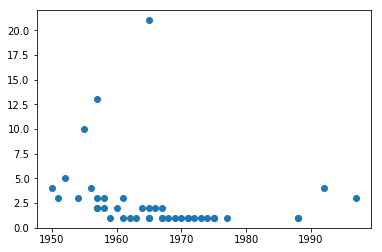

In [42]:
nvalues_sPoitier = cast[cast['name'] == 'Sidney Poitier']
x = nvalues_sPoitier['year']
y = nvalues_sPoitier['n']
plt.scatter(x, y)

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [48]:
n1_roles_split = cast[(cast['n'] == 1) & ((cast['year'] >= 1950) & (cast['year'] <= 1959)) ]['type'].value_counts()
n1_roles_split

actor      6692
actress    3040
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [49]:
n2_roles_split = cast[(cast['n'] == 2) & ((cast['year'] >= 1950) & (cast['year'] <= 1959)) ]['type'].value_counts()
n2_roles_split

actor      4640
actress    4635
Name: type, dtype: int64